# Import dataset pucuk daun teh dari google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/dataset/pucuk daun teh/90:5:5'

data_test  data_train  data_valid


# Import library yang diperlukan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, to_categorical, load_img
from keras.optimizers import Adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Softmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocessing Data
---
Load data, membuat path, resize ke (168, 244)


In [ ]:
# definisikan lokasi dataset
data_train = "/content/drive/MyDrive/dataset/pucuk daun teh/90:5:5/data_train"
data_valid = "/content/drive/MyDrive/dataset/pucuk daun teh/90:5:5/data_valid"
data_test = "/content/drive/MyDrive/dataset/pucuk daun teh/90:5:5/data_test"

In [ ]:
# Memuat gambar dari data latih
info_train = cv2.imread(data_train)
# Memuat gambar dari data validasi
info_valid = cv2.imread(data_valid)
# Memuat gambar dari data tes
info_test = cv2.imread(data_test)

In [ ]:
datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
train = datagen.flow_from_directory(
    data_train,
    target_size = (168, 244),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32
)

valid = datagen.flow_from_directory(
    data_valid,
    target_size = (168, 244),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32
)

test = datagen.flow_from_directory(
    data_test,
    target_size = (168, 244),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 48,
    shuffle=False
)

Found 900 images belonging to 4 classes.
Found 52 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


In [ ]:
def resize_image(image):
    return tf.image.resize(image, (168, 244))

# tambahkan fungsi resize_image ke pipeline data
train.preprocessing_function = resize_image
valid.preprocessing_function = resize_image
test.preprocessing_function = resize_image

In [ ]:
# definisikan label data
train_labels = train.class_indices
valid_labels = valid.class_indices
test_labels = test.class_indices

# tampilkan label data
print(train_labels)
print(valid_labels)
print(test_labels)

{'0_belum_matang': 0, '1_set_matang': 1, '2_matang': 2, '3_tua': 3}
{'0_belum_matang': 0, '1_set_matang': 1, '2_matang': 2, '3_tua': 3}
{'0_belum_matang': 0, '1_set_matang': 1, '2_matang': 2, '3_tua': 3}


# Transformation
---
Normalisasi Z-Score

In [ ]:
def normalize_zscore(data):
    mean = tf.reduce_mean(data)
    std = tf.math.reduce_std(data)
    return (data - mean) / std

# tambahkan fungsi normalize_zscore ke pipeline data
train.preprocessing_function = normalize_zscore
valid.preprocessing_function = normalize_zscore
test.preprocessing_function = normalize_zscore

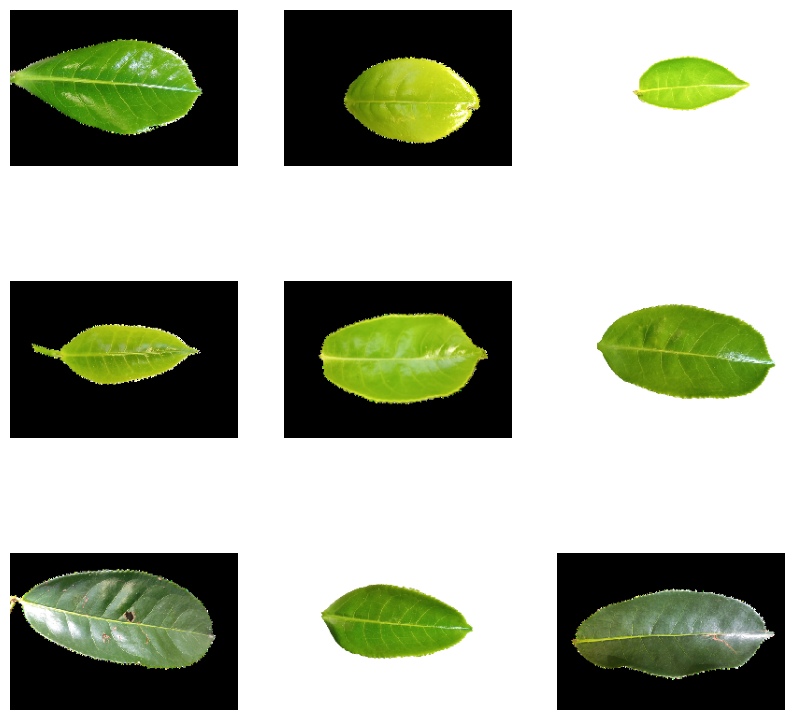

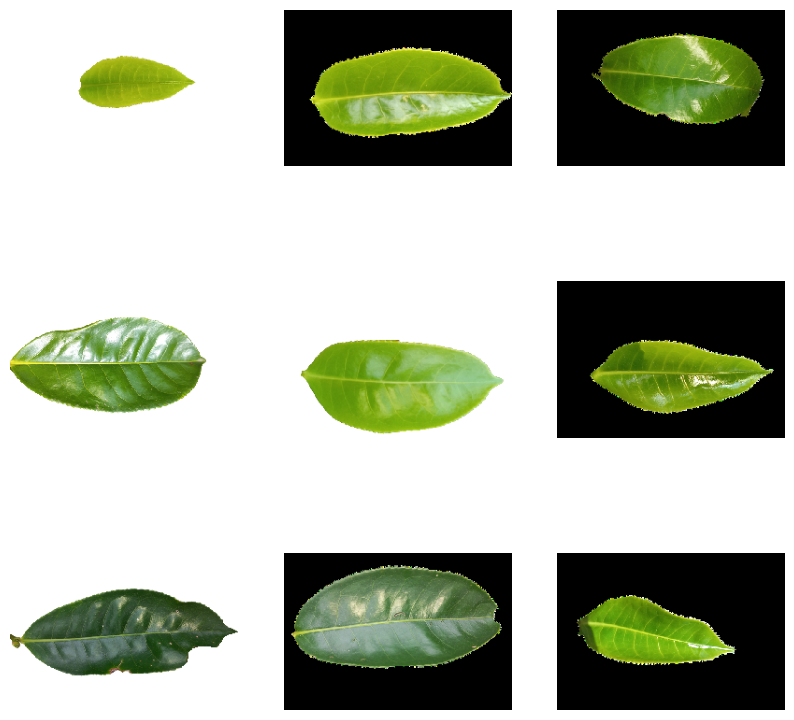

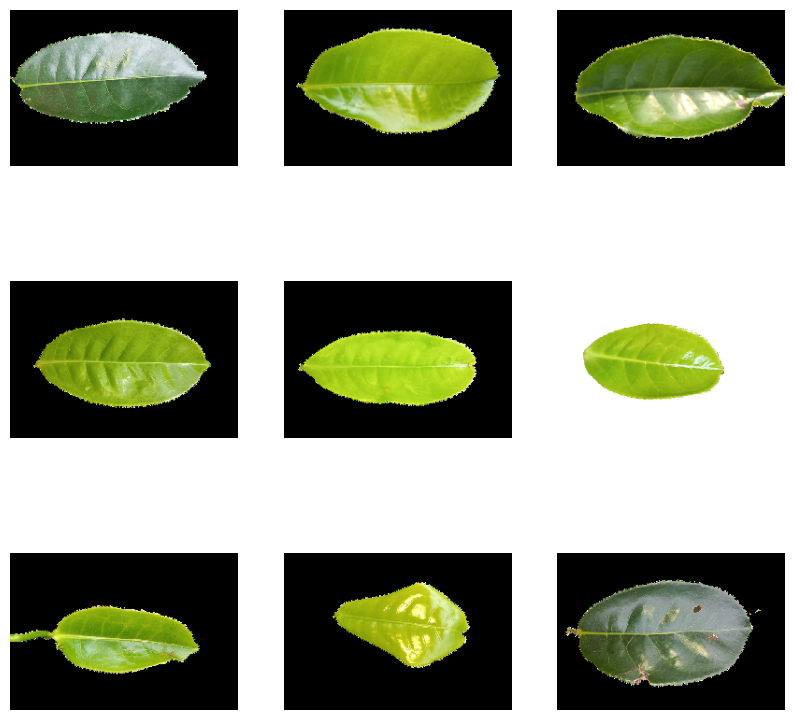

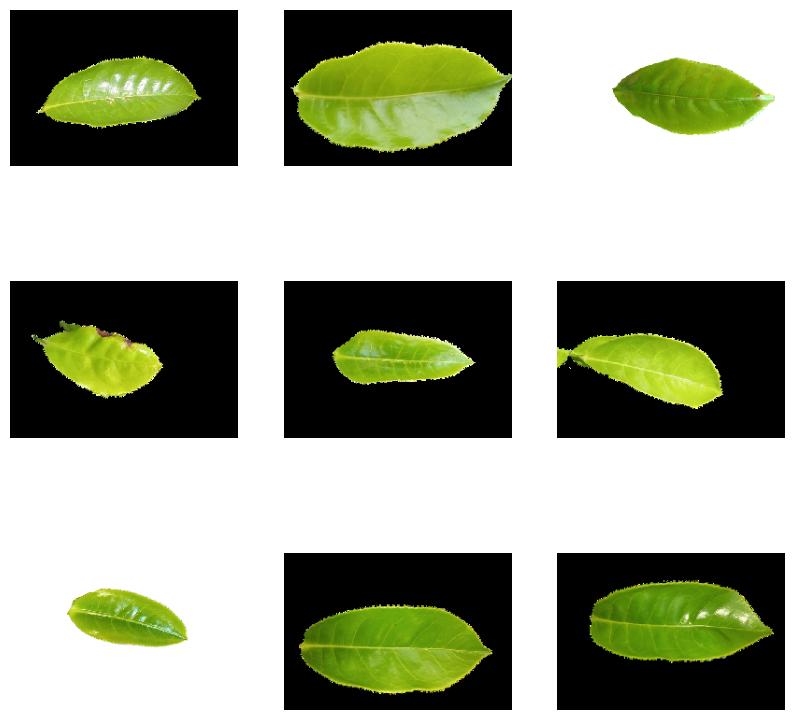

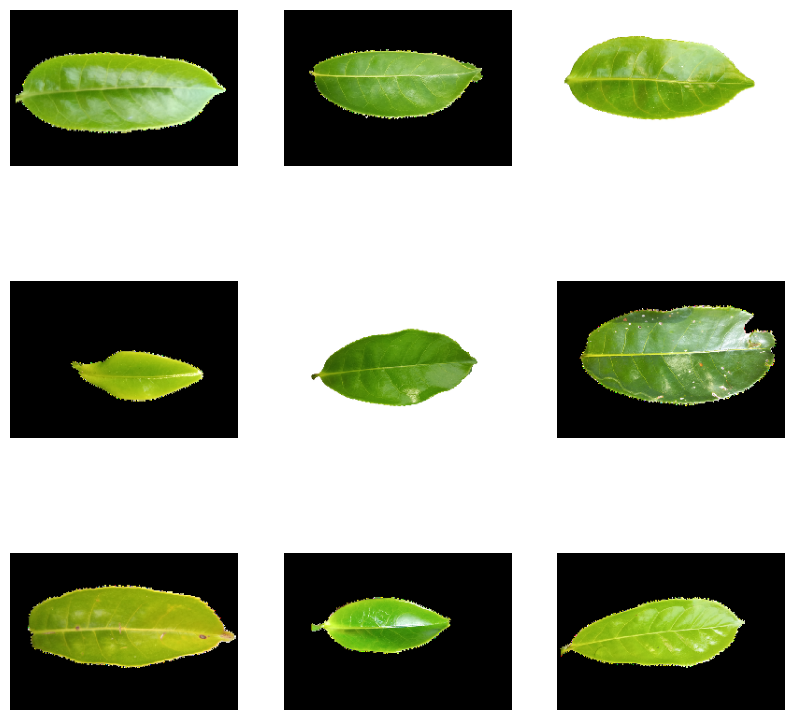

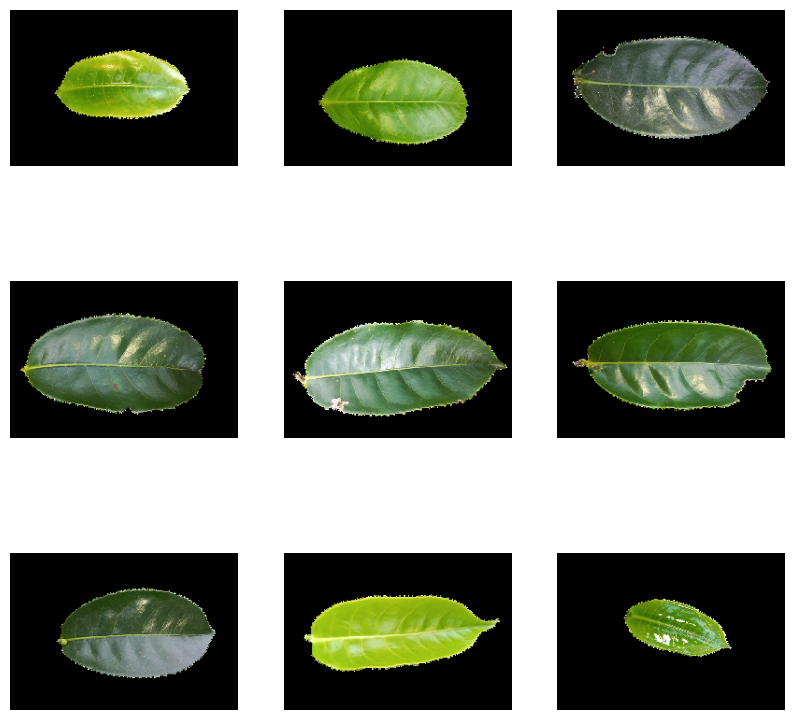

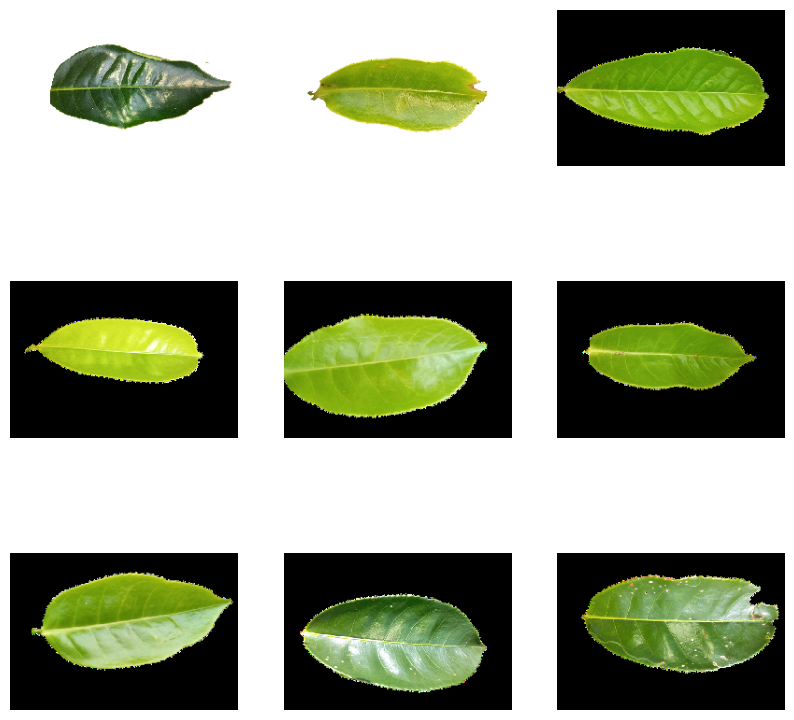

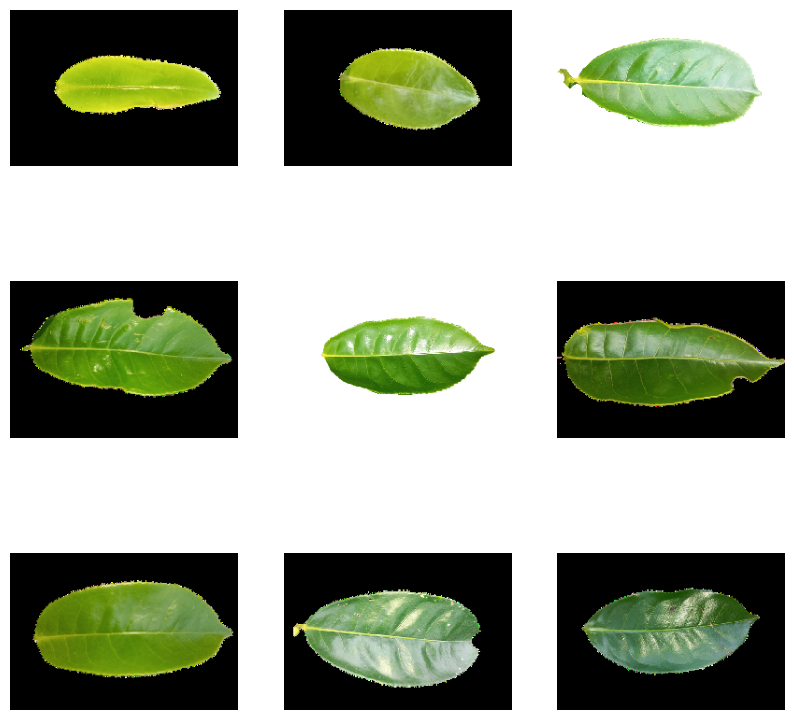

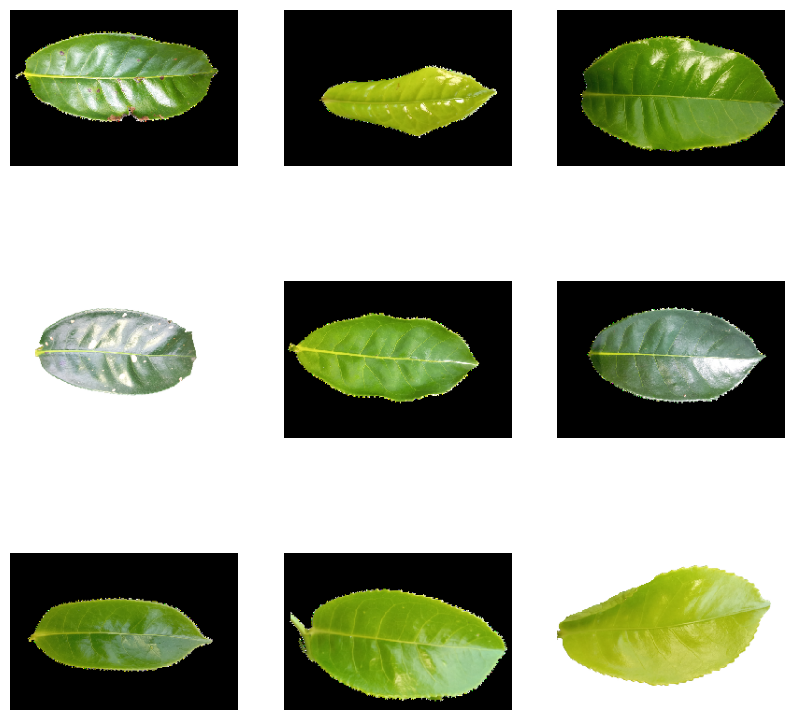

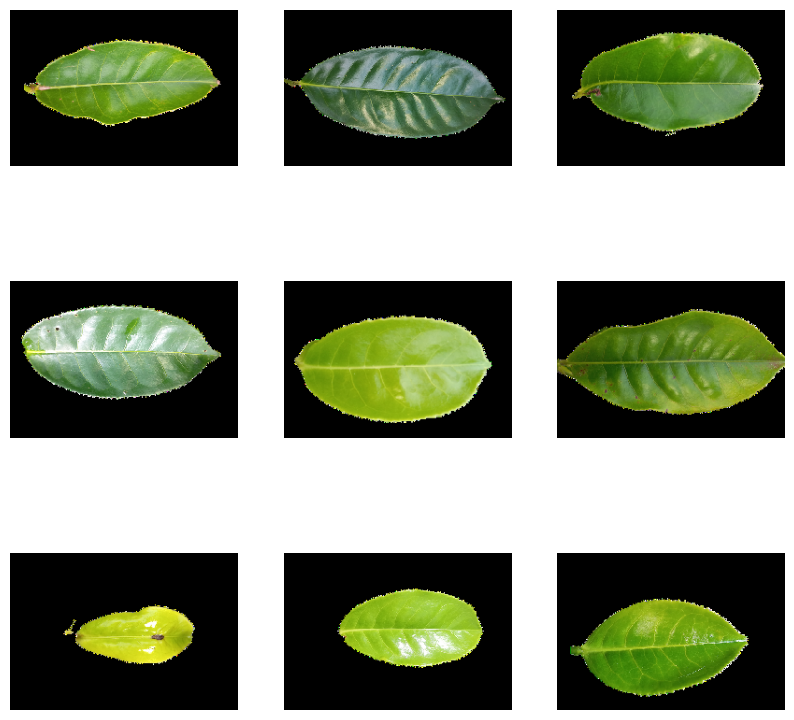

In [ ]:
for _ in range(10):  # Change this range to see more batches
    img_batch, label_batch = next(train)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Displaying first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_batch[i])
        plt.axis('off')
    plt.show()

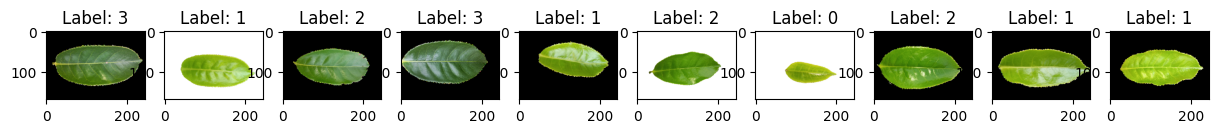

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mendapatkan satu batch data dari generator
batch_images, batch_labels = valid.next()

# Maksimal empat gambar yang akan ditampilkan
num_images = min(10, len(batch_images))

# Membuat subplot untuk menampilkan gambar dan label
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    # Menampilkan gambar
    axes[i].imshow(batch_images[i])
    axes[i].set_title(f"Label: {np.argmax(batch_labels[i])}")

plt.show()


# Data Mining
---
Melakukan proses algoritma CNN dengan arsitektur LeafNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inisialisasi model
LeafNet = Sequential()

# Convolutional Layer 1
LeafNet.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(168, 244, 3)))
LeafNet.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
LeafNet.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
LeafNet.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
LeafNet.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Convolutional Layer 4
LeafNet.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Convolutional Layer 5
LeafNet.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
LeafNet.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
LeafNet.add(Flatten())

# Fully Connected Layer 1
LeafNet.add(Dense(512, activation='relu'))
LeafNet.add(Dropout(0.5))

# Fully Connected Layer 2
LeafNet.add(Dense(256, activation='relu'))
LeafNet.add(Dropout(0.5))

# Fully Connected Layer 3
LeafNet.add(Dense(128, activation='relu'))
LeafNet.add(Dropout(0.5))

# Output Layer (Softmax)
LeafNet.add(Dense(4, activation='softmax'))

# Compile model dengan optimizer terbaik
LeafNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
LeafNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 83, 121, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 81, 119, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 59, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 57, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 36, 55, 128)       1

Epoch 1/50
29/29 [==============================] - 140s 5s/step - loss: 1.4169 - accuracy: 0.2667 - val_loss: 1.2266 - val_accuracy: 0.6731
Epoch 2/50
29/29 [==============================] - 17s 589ms/step - loss: 1.1943 - accuracy: 0.4600 - val_loss: 0.8751 - val_accuracy: 0.6731
Epoch 3/50
29/29 [==============================] - 17s 582ms/step - loss: 0.9148 - accuracy: 0.5833 - val_loss: 0.6336 - val_accuracy: 0.6923
Epoch 4/50
29/29 [==============================] - 17s 572ms/step - loss: 0.8127 - accuracy: 0.6422 - val_loss: 0.5550 - val_accuracy: 0.7115
Epoch 5/50
29/29 [==============================] - 17s 562ms/step - loss: 0.7489 - accuracy: 0.6522 - val_loss: 0.6342 - val_accuracy: 0.6731
Epoch 6/50
29/29 [==============================] - 16s 559ms/step - loss: 0.7530 - accuracy: 0.6611 - val_loss: 0.7393 - val_accuracy: 0.7500
Epoch 7/50
29/29 [==============================] - 17s 565ms/step - loss: 0.6691 - accuracy: 0.6933 - val_loss: 0.4252 - val_accuracy: 0.8462
E

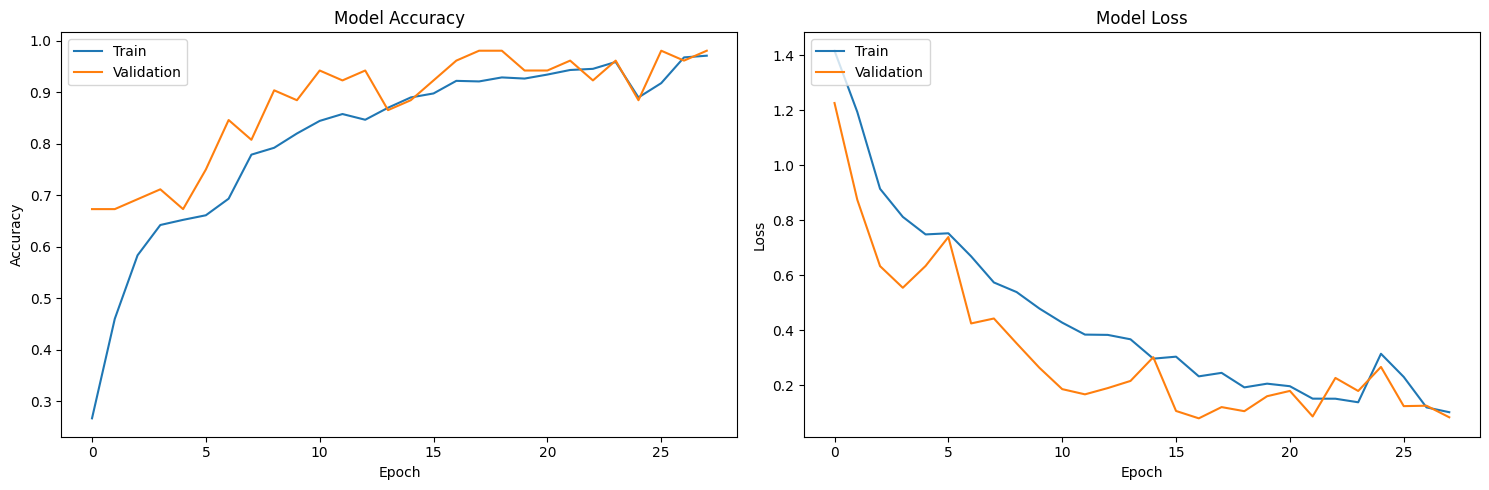

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# target_accuracy = 0.95

# Inisialisasi EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Melatih model dengan menggunakan callbacks
history_LeafNet = LeafNet.fit(train, epochs = 50, validation_data = valid, callbacks=[early_stopping])

import matplotlib.pyplot as plt

# Membuat figure dan subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy values
axes[0].plot(history_LeafNet.history['accuracy'])
axes[0].plot(history_LeafNet.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history_LeafNet.history['loss'])
axes[1].plot(history_LeafNet.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menyimpan plot ke file
fig.savefig("Training_and_Validation_Metrics.png")

# Evaluasi
---
Mengukur kemampuan model CNN dengan metrik accuracy, recall, precision, F1-Score

In [ ]:
# Evaluasi model menggunakan data validasi
test_loss, test_accuracy = LeafNet.evaluate(train)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

29/29 [==============================] - 8s 269ms/step - loss: 0.1243 - accuracy: 0.9600
Test Loss: 0.12429706752300262
Test Accuracy: 0.9599999785423279


In [ ]:
# Evaluasi model menggunakan data validasi
test_loss, test_accuracy = LeafNet.evaluate(valid)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 [==============================] - 1s 166ms/step - loss: 0.1210 - accuracy: 0.9808
Test Loss: 0.12102293223142624
Test Accuracy: 0.9807692170143127


In [ ]:
# Evaluasi model menggunakan data uji
test_loss, test_accuracy = LeafNet.evaluate(test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 1s 583ms/step - loss: 0.1881 - accuracy: 0.9375
Test Loss: 0.1881294995546341
Test Accuracy: 0.9375


2/2 [==============================] - 0s 42ms/step
    True Label  Predicted Label
0            0                0
1            0                0
2            0                0
3            0                0
4            0                0
5            0                0
6            0                0
7            0                0
8            0                0
9            0                0
10           0                0
11           0                0
12           1                1
13           1                1
14           1                1
15           1                1
16           1                1
17           1                1
18           1                1
19           1                1
20           1                1
21           1                1
22           1                1
23           1                1
24           2                2
25           2                2
26           2                2
27           2                2
28           2      

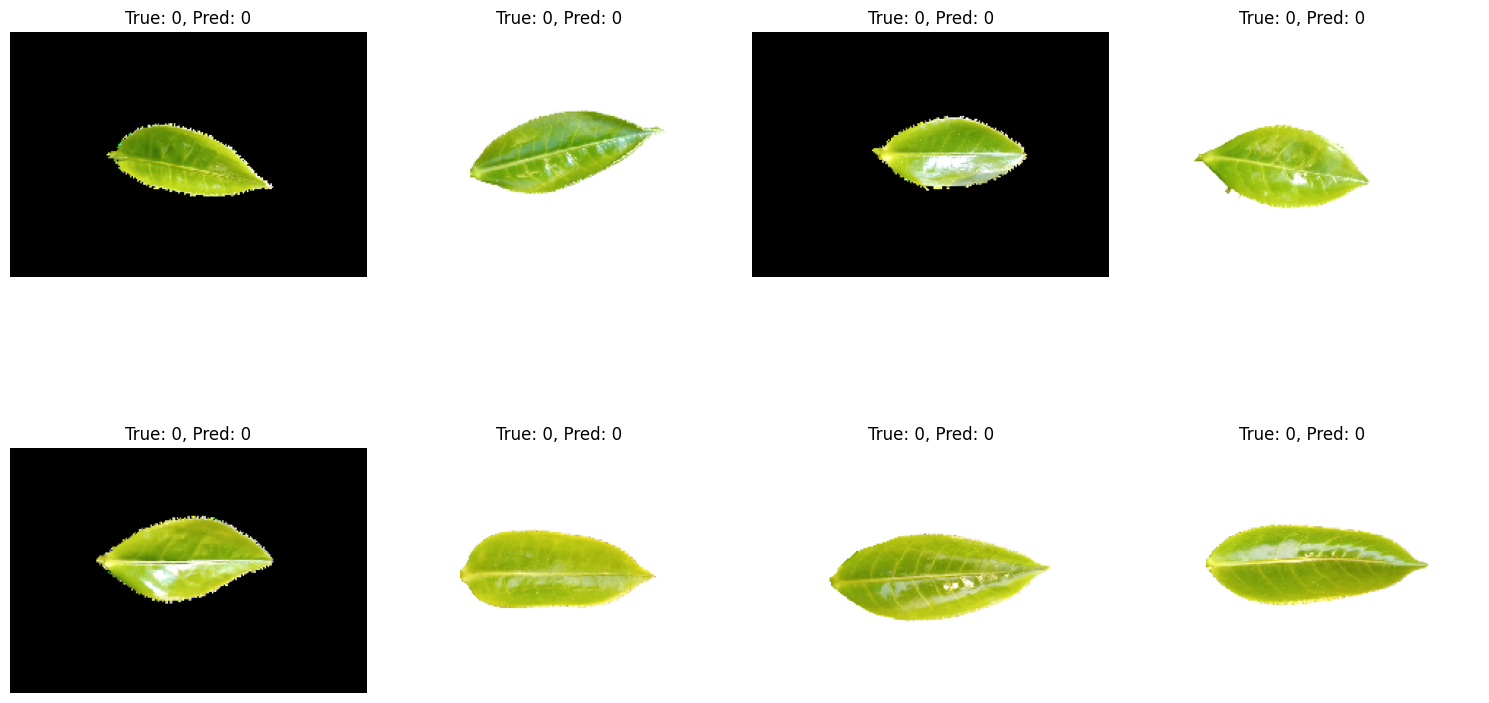

In [ ]:
images_test, true_labels_test = test.next()

# Prediksi label menggunakan model
predictions_test = LeafNet.predict(images_test)
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Buat DataFrame untuk menampilkan tabel prediksi
true_labels_test_indices = np.argmax(true_labels_test, axis=1)
data = {
    "True Label": true_labels_test_indices,
    "Predicted Label": predicted_labels_test
}
df_predictions = pd.DataFrame(data)

# Tampilkan tabel prediksi
print(df_predictions)

# Menampilkan beberapa gambar dan prediksinya
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
num_images_to_display = 8  # menampilkan 8 gambar
for i in range(num_images_to_display):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(images_test[i])
    axes[row, col].set_title(f"True: {true_labels_test_indices[i]}, Pred: {predicted_labels_test[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

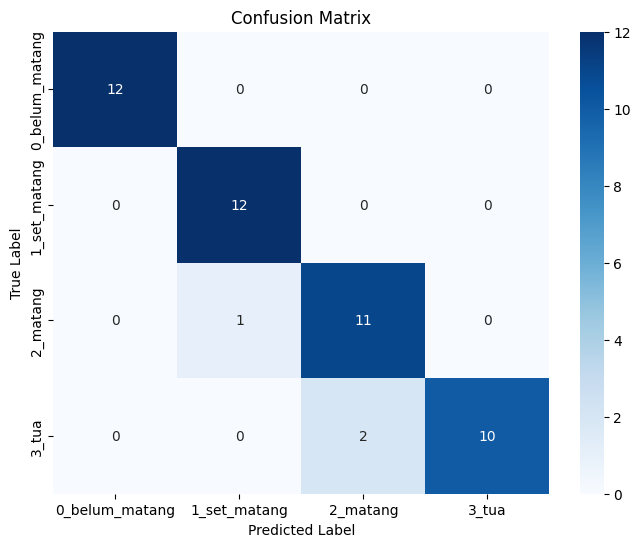

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Buat confusion matrix
cm = confusion_matrix(true_labels_test_indices, predicted_labels_test)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Buat laporan klasifikasi
report = classification_report(true_labels_test_indices, predicted_labels_test, target_names=test.class_indices.keys())
print(report)

                precision    recall  f1-score   support

0_belum_matang       1.00      1.00      1.00        12
  1_set_matang       0.92      1.00      0.96        12
      2_matang       0.85      0.92      0.88        12
         3_tua       1.00      0.83      0.91        12

      accuracy                           0.94        48
     macro avg       0.94      0.94      0.94        48
  weighted avg       0.94      0.94      0.94        48





---



In [ ]:
# Menyimpan model ke Google Drive
LeafNet.save('/content/drive/My Drive/project/LeafNet_model3.h5')

# Simpan DataFrame ke file CSV
df_predictions.to_csv('/content/drive/My Drive/project/LeafNet_predictions3.csv', index=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: tolong buatkan interface upload gambar untuk klasifikasi

from google.colab import files
from IPython.display import display, Image
import ipywidgets as widgets

# Upload gambar
uploaded = files.upload()

# Tampilkan gambar yang diupload
if uploaded:
  filename = next(iter(uploaded))
  display(Image(filename))

  # Muat dan preprocess gambar
  img = load_img(filename, target_size=(168, 244))
  img_array = img_to_array(img)
  img_array = img_array / 255.0  # Normalisasi
  img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

  # Prediksi kelas gambar
  prediction = LeafNet.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Tampilkan hasil prediksi
  class_labels = list(test.class_indices.keys())
  predicted_label = class_labels[predicted_class]
  print("Prediksi:", predicted_label)


In [1]:
!git clone https://github.com/muhamadfaisalraafi/CNN-LeafNet-Architecture

Cloning into 'CNN-LeafNet-Architecture'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), done.


In [2]:
%cd CNN-LeafNet-Architecture

/content/CNN-LeafNet-Architecture


In [8]:
!cp /content/drive/My Drive/project/LeafNet.ipynb /content/CNN-LeafNet-Architecture/

cp: cannot stat '/content/drive/My': No such file or directory
cp: cannot stat 'Drive/project/LeafNet.ipynb': No such file or directory
